# Home Credit Default Risk Analytics with Python

<ul>
	<li>0. Preparation</li>
	<li>1. Data Exploration</li>
		<ul>
			<li>1.1 Train & Test </li>
                <ul>
                    <li>1.1.1 AMT_INCOME_TOTAL</li>
                    <li>1.1.2 NAME_EDUCATION_TYPE</li>
                    <li>1.1.3 NAME_HOUSING_TYPE</li>
                    <li>1.1.5 ORGANIZATION_TYPE</li>
                    <li>1.1.6 Docs</li>
                    <li>1.1.7 DAYS_BIRTH</li>
                    <li>1.1.8 DAYS_ID_PUBLISH</li>
                    <li>1.1.9 DAYS_REGISTRATION</li>
                    <li>1.1.10 NAME_CONTRACT_TYPE</li>
                    <li>1.1.11 Family</li>
                    <li>1.1.12 Estate</li>
                  <li>1.1.13 Communication by Phone,Mail</li>
               </ul>
      <li>1.2 Previous </li>
      <li>1.3 Installment </li>        
                <ul>
                    <li>1.3.1 DAYS_INSTALMENT</li>
                    <li>1.3.2 AMT_INSTALMENT</li>
                </ul>
			</ul>
		     
<li>2. Feature Engineering</li>
		<ul>
			<li>2.1 </li>
			<li>2.2 </li>
		</ul>
    <li>3. Filling Missing Values</li>
        <ul>
            <li>3.1 </li>
            <li>3.2 </li>
            <li>3.3 </li>
        </ul>
    <li>4. Data Categorization & Dummy</li>
        <ul>
            <li>4.1 </li>
            <li>4.2 </li>
        </ul>
	<li>5. Modeling</li>
		<ul>
			<li>5.1 Cross-Validation</li>
			<li>5.2 Tunning Parameters</li>
			<li>5.3 Learning Curve</li>
			<li>5.4 Model Feature Importance</li>
			<li>5.5 Ensemble Modeling</li>
		</ul>
	<li>6. Prediction</li>
<ul>

# 0. Preparation

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.decomposition import PCA
warnings.simplefilter(action='ignore', category=FutureWarning)

 
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',500)

In [0]:
def make_bins1(data,col,num_bins):
    
    New_col1=col+'_binned'
    data[New_col1] = pd.cut(data[col], num_bins)
    
    return data[New_col1]


def make_bins2(data,col,num_bins):
    
    New_col1=col+'_rank'
    data[New_col1]=data[col].rank(method='max')
    New_col2=col+'_group'
    data[New_col2] = pd.cut(data[New_col1], num_bins)
    
    return data[New_col2]

def anova(col1,col2,data):
    print('************Variance**************')
    print(data[[col1,col2]].groupby(col1).var())
    print('*********************************')
    print('************Value_counts**************')
    print(data[col1].value_counts())
    print('*********************************')
    print('************anova**************')
    model = ols('{} ~ C({})'.format(col2,col1),data).fit()
    b=anova_lm(model)
    print(b)

In [0]:
na.strings=c("NA","NaN","?", "","XNA"))

# 1. Data Exploration & Data Cleansing & Feature Engineering

## 1-1.train,test

In [0]:
train=pd.read_csv("../input/application_train.csv")
test=pd.read_csv("../input/application_test.csv")
total=[train,test]

In [0]:
k=test.isnull().sum()
k

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        24
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                   911
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     32312
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

In [0]:
lst=test.columns[k>0]

In [0]:
lst

['AMT_ANNUITY',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMEN

In [0]:
for col in lst:
    del train[col],test[col]

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307494 entries, 0 to 307510
Data columns (total 65 columns):
SK_ID_CURR                     307494 non-null int64
TARGET                         307494 non-null int64
NAME_CONTRACT_TYPE             307494 non-null object
CODE_GENDER                    307494 non-null object
FLAG_OWN_CAR                   307494 non-null object
FLAG_OWN_REALTY                307494 non-null object
AMT_INCOME_TOTAL               307494 non-null float64
AMT_CREDIT                     307494 non-null float64
AMT_GOODS_PRICE                307216 non-null float64
NAME_INCOME_TYPE               307494 non-null object
NAME_EDUCATION_TYPE            307494 non-null object
NAME_FAMILY_STATUS             307494 non-null object
NAME_HOUSING_TYPE              307494 non-null object
REGION_POPULATION_RELATIVE     307494 non-null float64
DAYS_BIRTH                     307494 non-null float64
DAYS_EMPLOYED                  307494 non-null int64
DAYS_REGISTRATION      

In [0]:
train.describe()

In [0]:
test.info()

In [0]:
test.describe()

### Correlation

In [0]:
a=train.corr()

In [0]:
cols=a.columns
rows=a.index.values
for i in range(a.shape[0]):
    for j in range(i+1,a.shape[1]):
        if (a.iloc[i,j]>=0.3):
            print(cols[j],',',rows[i],',',a.iloc[i,j])


### 1-1-1 AMT_INCOME_TOTAL

In [0]:
print('Before:{}'.format(train.shape))
train=train[(train.AMT_INCOME_TOTAL<=test.AMT_INCOME_TOTAL.max()) & (train.AMT_INCOME_TOTAL>=test.AMT_INCOME_TOTAL.min())]
print('After:{}'.format(train.shape))

Before:(307511, 122)
After:(307494, 122)


In [0]:
#train[['AMT_INCOME_TOTAL','TARGET']].groupby(['TARGET']).describe()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

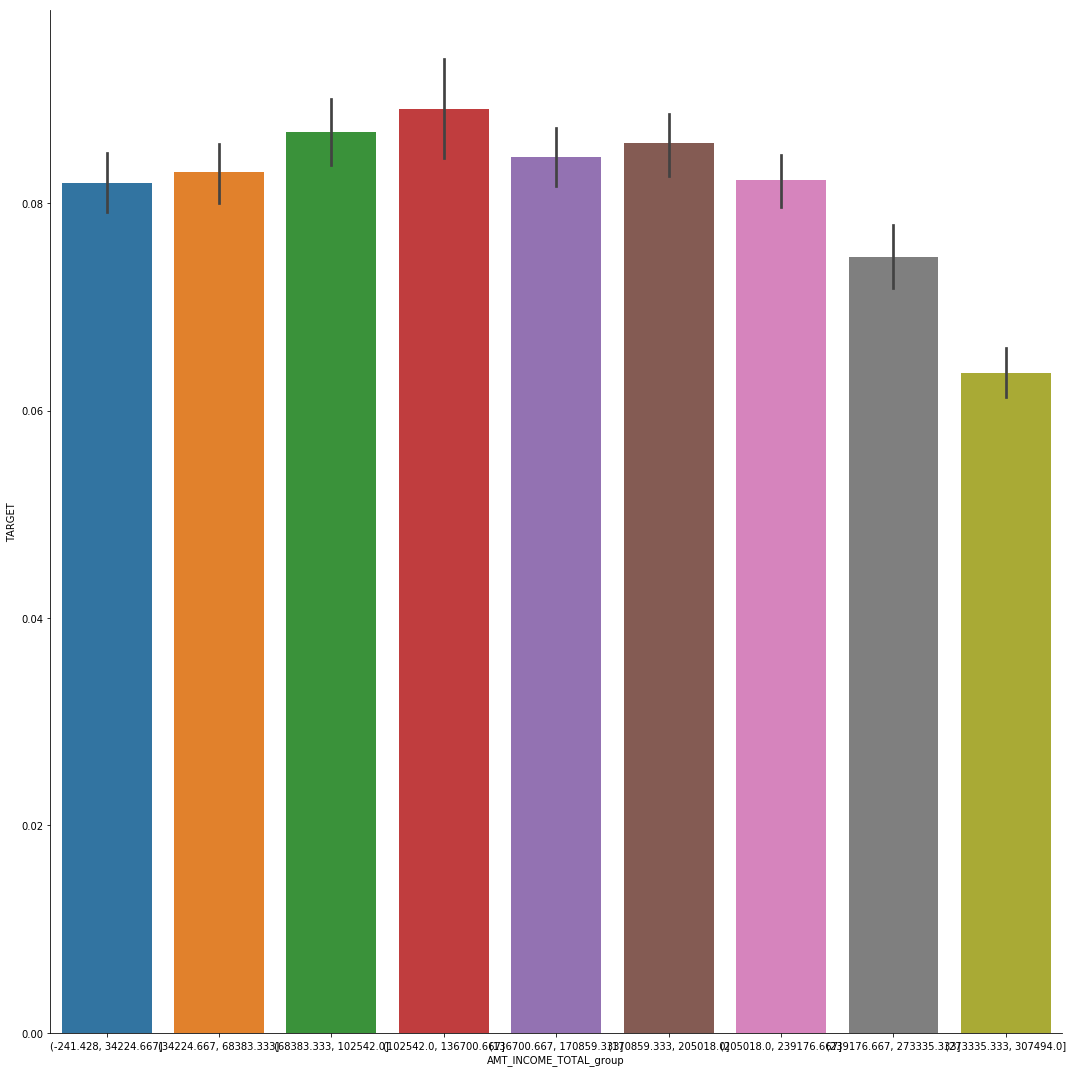

In [0]:
col_x='AMT_INCOME_TOTAL';col_y='TARGET';num_bin=9
#;bins = np.linspace(train[col_x].min(),train[col_x].max(),num_bin)
train['AMT_INCOME_TOTAL_group'] = make_bins2(train,col_x,num_bin)
sns.catplot(x='AMT_INCOME_TOTAL_group',y=col_y,data=train,kind='bar',height=15)

In [0]:

anova('AMT_INCOME_TOTAL_group','TARGET',train)


************Variance**************
                            TARGET
AMT_INCOME_TOTAL_group            
(-241.428, 34224.667]     0.075263
(34224.667, 68383.333]    0.076103
(68383.333, 102542.0]     0.079296
(102542.0, 136700.667]    0.081144
(136700.667, 170859.333]  0.077333
(170859.333, 205018.0]    0.078426
(205018.0, 239176.667]    0.075484
(239176.667, 273335.333]  0.069258
(273335.333, 307494.0]    0.059592
*********************************
************Value_counts**************
(205018.0, 239176.667]      46932
(136700.667, 170859.333]    42822
(273335.333, 307494.0]      37979
(170859.333, 205018.0]      34366
(34224.667, 68383.333]      33752
(-241.428, 34224.667]       33678
(68383.333, 102542.0]       33328
(239176.667, 273335.333]    31726
(102542.0, 136700.667]      12911
Name: AMT_INCOME_TOTAL_group, dtype: int64
*********************************
************anova**************
                                 df      ...             PR(>F)
C(AMT_INCOME_TOTAL_group)   

### 1-1-2.NAME_EDUCATION_TYPE

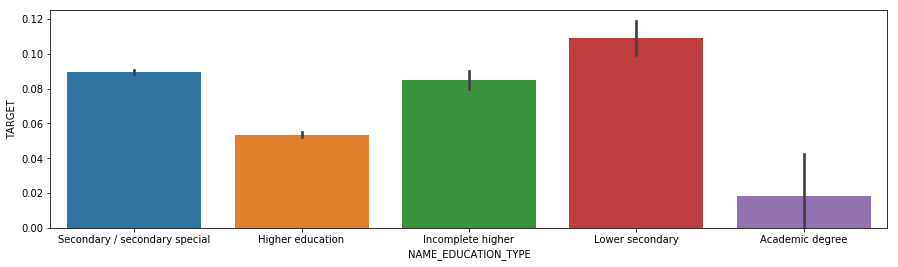

In [0]:
f,ax=plt.subplots(1,1,figsize=(15,4))
sns.barplot(x='NAME_EDUCATION_TYPE',y='TARGET',data=train)

In [0]:
anova('NAME_EDUCATION_TYPE','TARGET',train)

************Variance**************
                                 TARGET
NAME_EDUCATION_TYPE                    
Academic degree                0.018068
Higher education               0.050688
Incomplete higher              0.077658
Lower secondary                0.097383
Secondary / secondary special  0.081403
*********************************
************Value_counts**************
Secondary / secondary special    218381
Higher education                  74857
Incomplete higher                 10277
Lower secondary                    3815
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
*********************************
************anova**************
                              df      ...               PR(>F)
C(NAME_EDUCATION_TYPE)       4.0      ...        1.337447e-219
Residual                307489.0      ...                  NaN

[2 rows x 5 columns]


### 1-1-3. NAME_HOUSING_TYPE

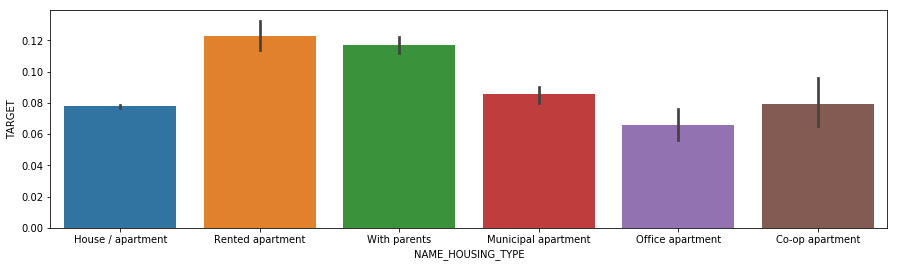

In [0]:
f,ax=plt.subplots(1,1,figsize=(15,4))
sns.barplot(x='NAME_HOUSING_TYPE',y='TARGET',data=train)

In [0]:
anova('NAME_HOUSING_TYPE','TARGET',train)

************Variance**************
                       TARGET
NAME_HOUSING_TYPE            
Co-op apartment      0.073096
House / apartment    0.071878
Municipal apartment  0.078112
Office apartment     0.061428
Rented apartment     0.107992
With parents         0.103310
*********************************
************Value_counts**************
House / apartment      272852
With parents            14839
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64
*********************************
************anova**************
                            df      ...             PR(>F)
C(NAME_HOUSING_TYPE)       5.0      ...       8.821944e-89
Residual              307488.0      ...                NaN

[2 rows x 5 columns]


### 1-1-5. ORGANIZATION_TYPE

In [0]:
train[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE']).mean().sort_values(by='TARGET',ascending=False)

,TARGET
ORGANIZATION_TYPE,
Transport: type 3,0.157540
Industry: type 13,0.134328
Industry: type 8,0.125000
Restaurant,0.117062
Construction,0.116833
Cleaning,0.111538
Industry: type 1,0.110683
Industry: type 3,0.106162
Realtor,0.106061


In [0]:
train['ORGANIZATION_TYPE'].value_counts()/307494

Business Entity Type 3    0.221107
XNA                       0.180062
Self-employed             0.124916
Other                     0.054255
Medicine                  0.036397
Business Entity Type 2    0.034319
Government                0.033835
School                    0.028918
Trade: type 7             0.025467
Kindergarten              0.022374
Construction              0.021851
Business Entity Type 1    0.019457
Transport: type 4         0.017552
Trade: type 3             0.011356
Industry: type 9          0.010953
Industry: type 3          0.010660
Security                  0.010560
Housing                   0.009620
Industry: type 11         0.008794
Military                  0.008563
Bank                      0.008153
Agriculture               0.007981
Police                    0.007613
Transport: type 2         0.007168
Postal                    0.007015
Security Ministries       0.006420
Trade: type 2             0.006179
Restaurant                0.005890
Services            

In [0]:
anova('ORGANIZATION_TYPE','TARGET',train)

************Variance**************
                          TARGET
ORGANIZATION_TYPE               
Advertising             0.075104
Agriculture             0.093797
Bank                    0.049186
Business Entity Type 1  0.074784
Business Entity Type 2  0.078018
Business Entity Type 3  0.084341
Cleaning                0.099480
Construction            0.103198
Culture                 0.052477
Electricity             0.061983
Emergency               0.066445
Government              0.064918
Hotel                   0.060125
Housing                 0.073159
Industry: type 1        0.098527
Industry: type 10       0.060652
Industry: type 11       0.079079
Industry: type 12       0.036600
Industry: type 13       0.118046
Industry: type 2        0.067007
Industry: type 3        0.094921
Industry: type 4        0.091288
Industry: type 5        0.063869
Industry: type 6        0.066924
Industry: type 7        0.073939
Industry: type 8        0.114130
Industry: type 9        0.062361
Insuranc

### 1-1-6. Docs

In [0]:
docs = [f for f in train.columns if 'FLAG_DOC' in f]

In [0]:
for doc in docs:
    print(train.groupby(doc)[['TARGET']].mean())

                   TARGET
FLAG_DOCUMENT_2          
0                0.080717
1                0.307692
                   TARGET
FLAG_DOCUMENT_3          
0                0.061819
1                0.088449
                   TARGET
FLAG_DOCUMENT_4          
0                0.080733
1                0.000000
                   TARGET
FLAG_DOCUMENT_5          
0                0.080737
1                0.080034
                   TARGET
FLAG_DOCUMENT_6          
0                0.083148
1                0.055656
                   TARGET
FLAG_DOCUMENT_7          
0                0.080733
1                0.050847
                   TARGET
FLAG_DOCUMENT_8          
0                0.081378
1                0.073375
                   TARGET
FLAG_DOCUMENT_9          
0                0.080801
1                0.061821
                    TARGET
FLAG_DOCUMENT_10          
0                 0.080729
1                 0.000000
                    TARGET
FLAG_DOCUMENT_11          
0     

In [0]:
train['DOCUMENT_COUNT'] = train[docs].sum(axis=1)
train['DOCUMENT_COUNT'].describe()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    307494.000000
mean          0.930161
std           0.344292
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: DOCUMENT_COUNT, dtype: float64

In [0]:
train.groupby('DOCUMENT_COUNT')[['TARGET']].mean()

,TARGET
DOCUMENT_COUNT,
0,0.055202
1,0.084491
2,0.046370
3,0.098160
4,1.000000


In [0]:
train.groupby('DOCUMENT_COUNT')[['TARGET']].count()

,TARGET
DOCUMENT_COUNT,
0,29546
1,270042
2,7742
3,163
4,1


### 1-1-7. DAYS_BIRTH

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


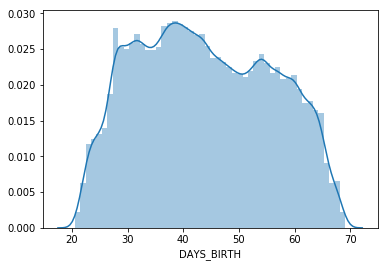

In [0]:
train['DAYS_BIRTH'] = train['DAYS_BIRTH'].apply(lambda x: -x / 365)
sns.distplot(train['DAYS_BIRTH'])

In [0]:
train['DAYS_BIRTH'].describe()

count    307494.000000
mean         43.936700
std          11.956231
min          20.517808
25%          34.008219
50%          43.150685
75%          53.922603
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [0]:
def get_age_label(age):
    """ Return the age group label (int). """
    if age < 27: return 1
    elif age < 40: return 2
    elif age < 50: return 3
    elif age < 65: return 4
    elif age < 99: return 5
    else: return 0
train['AGE_RANGE'] = train['DAYS_BIRTH'].apply(lambda x: get_age_label(x))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


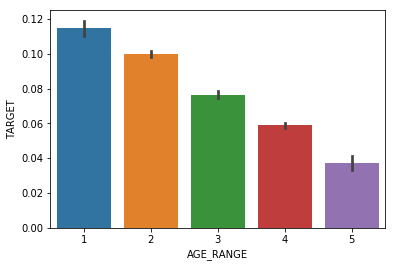

In [0]:
sns.barplot(x='AGE_RANGE',y='TARGET',data=train)

In [0]:
anova('AGE_RANGE','TARGET',train)

************Variance**************
             TARGET
AGE_RANGE          
1          0.101445
2          0.090041
3          0.070701
4          0.055384
5          0.035805
*********************************
************Value_counts**************
2    106417
4     95537
3     76539
1     20879
5      8122
Name: AGE_RANGE, dtype: int64
*********************************
************anova**************
                    df        sum_sq    mean_sq           F  PR(>F)
C(AGE_RANGE)       4.0    126.106769  31.526692  427.184849     0.0
Residual      307489.0  22693.012410   0.073801         NaN     NaN


### 1-1-8. DAYS_ID_PUBLISH

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


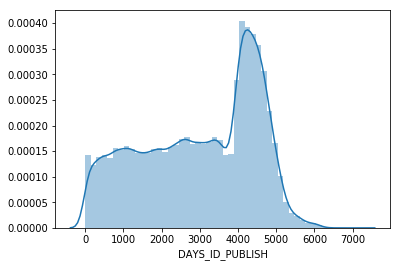

In [0]:
train['DAYS_ID_PUBLISH'] = train['DAYS_ID_PUBLISH'].apply(lambda x: -x)
sns.distplot(train['DAYS_ID_PUBLISH'])

In [0]:
train['DAYS_ID_PUBLISH'].describe()

count    307494.000000
mean       2994.181428
std        1509.453403
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [0]:
def make_bins1(data,col,num_bins):
    
    New_col1=col+'_binned'
    data[New_col1] = pd.cut(data[col], num_bins)
    return data[New_col1]

In [0]:
train['DAYS_ID_PUBLISH_binned']=make_bins1(train,'DAYS_ID_PUBLISH',7)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


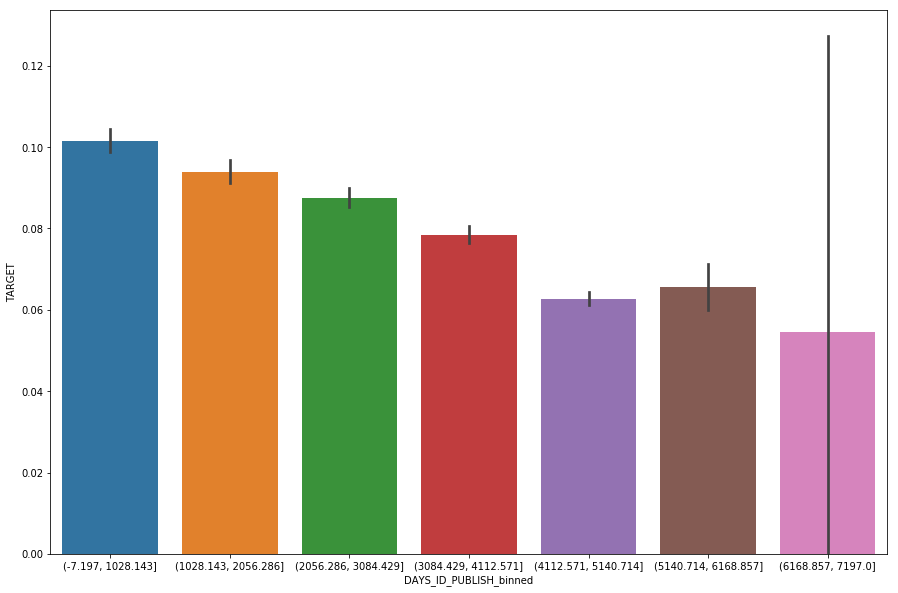

In [0]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
sns.barplot(x='DAYS_ID_PUBLISH_binned',y='TARGET',data=train,ax=ax)

In [0]:
train[['DAYS_ID_PUBLISH','DAYS_REGISTRATION']].corr()

,DAYS_ID_PUBLISH,DAYS_REGISTRATION
DAYS_ID_PUBLISH,1.000000,-0.101926
DAYS_REGISTRATION,-0.101926,1.000000


### 1-1-9. DAYS_REGISTRATION

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


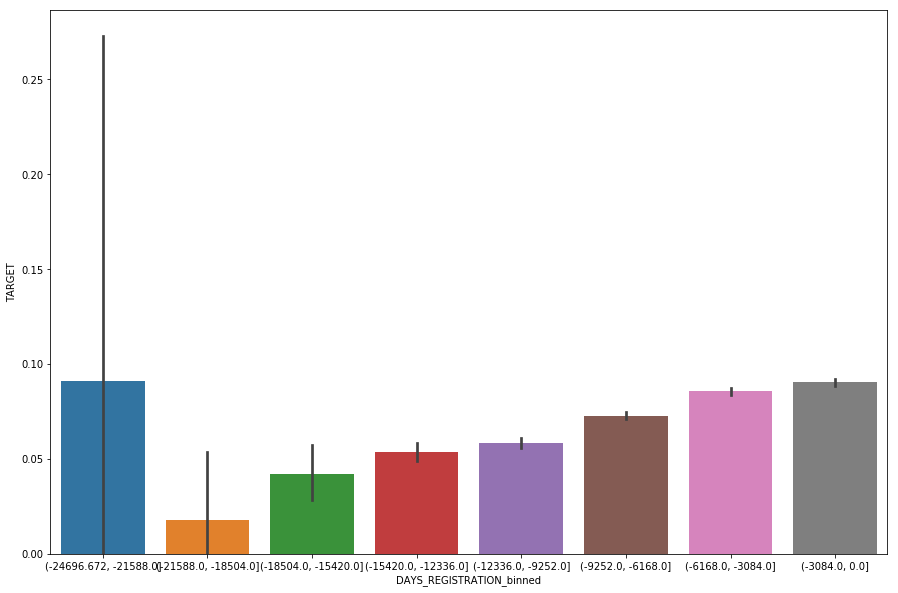

In [0]:
train['DAYS_REGISTRATION_binned']=make_bins1(train,'DAYS_REGISTRATION',8)
fig,ax=plt.subplots(1,1,figsize=(15,10))
sns.barplot(x='DAYS_REGISTRATION_binned',y='TARGET',data=train,ax=ax)

### 1-1-10. NAME_CONTRACT_TYPE

In [0]:
train.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278216
Revolving loans     29278
Name: NAME_CONTRACT_TYPE, dtype: int64

In [0]:
train[['NAME_CONTRACT_TYPE','TARGET']].groupby('NAME_CONTRACT_TYPE').mean()

,TARGET
NAME_CONTRACT_TYPE,
Cash loans,0.083457
Revolving loans,0.054785


In [0]:
anova('NAME_CONTRACT_TYPE','TARGET',train)

************Variance**************
                      TARGET
NAME_CONTRACT_TYPE          
Cash loans          0.076492
Revolving loans     0.051786
*********************************
************Value_counts**************
Cash loans         278216
Revolving loans     29278
Name: NAME_CONTRACT_TYPE, dtype: int64
*********************************
************anova**************
                             df      ...             PR(>F)
C(NAME_CONTRACT_TYPE)       1.0      ...       8.237143e-66
Residual               307492.0      ...                NaN

[2 rows x 5 columns]


## 1-1-11 family

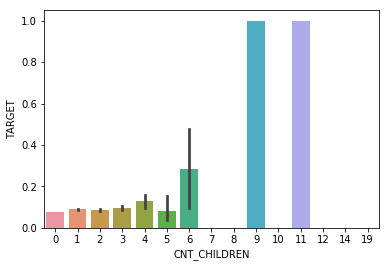

In [0]:
sns.barplot(x='CNT_CHILDREN',y='TARGET',data=train)

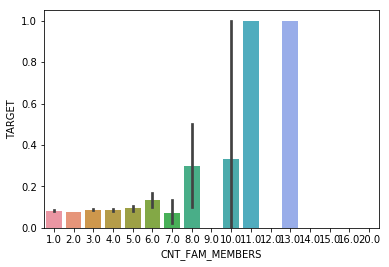

In [0]:
sns.barplot(x='CNT_FAM_MEMBERS',y='TARGET',data=train)

In [0]:
train[['CNT_CHILDREN','CNT_FAM_MEMBERS']].corr()

,CNT_CHILDREN,CNT_FAM_MEMBERS
CNT_CHILDREN,1.000000,0.879161
CNT_FAM_MEMBERS,0.879161,1.000000


In [0]:
del train['CNT_CHILDREN'],test['CNT_CHILDREN']

### 1-1-12. Estate

In [0]:
asset_lst=['FLAG_OWN_CAR','FLAG_OWN_REALTY','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']

In [0]:
train[asset_lst].head(3)

,FLAG_OWN_CAR,FLAG_OWN_REALTY,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,N,Y,2,2
1,N,N,1,1
2,Y,Y,2,2


In [0]:
train['FLAG_OWN_CAR']=train['FLAG_OWN_CAR'].apply(lambda x:0 if x=='N'else 1)
train['FLAG_OWN_REALTY']=train['FLAG_OWN_REALTY'].apply(lambda x:0 if x=='N'else 1)

In [0]:
train[asset_lst].corr()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
FLAG_OWN_CAR,1.000000,-0.002817,-0.022668,-0.021405
FLAG_OWN_REALTY,-0.002817,1.000000,0.001289,0.001884
REGION_RATING_CLIENT,-0.022668,0.001289,1.000000,0.950842
REGION_RATING_CLIENT_W_CITY,-0.021405,0.001884,0.950842,1.000000


In [0]:
del train['REGION_RATING_CLIENT_W_CITY'],test['REGION_RATING_CLIENT_W_CITY']

In [0]:
train['estate']=train[asset_lst].sum(axis=1)

In [0]:
train['estate'].describe()

count    307511.000000
mean          5.117765
std           1.189355
min           2.000000
25%           4.000000
50%           5.000000
75%           6.000000
max           8.000000
Name: estate, dtype: float64

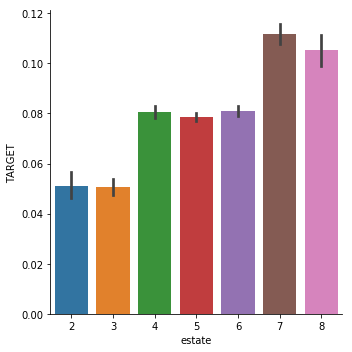

In [0]:
sns.catplot(x='estate',y='TARGET',data=train,kind='bar')

In [0]:
def classify_estate(x):
    if x<=3:
        return 'estate_low'
    elif x<=6:
        return 'estate_mid'
    else:
        return 'estate_high'

train['estate1']=train['estate'].apply(classify_estate)

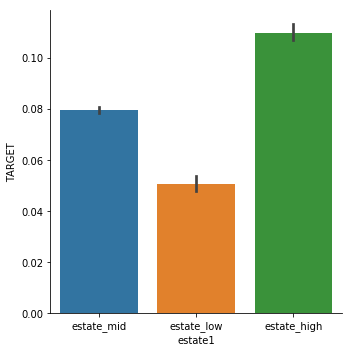

In [0]:
sns.catplot(x='estate1',y='TARGET',data=train,kind='bar')

In [0]:
anova('estate1','TARGET',train)

************Variance**************
               TARGET
estate1              
estate_high  0.097701
estate_low   0.048115
estate_mid   0.073217
*********************************
************Value_counts**************
estate_mid     247787
estate_high     35356
estate_low      24368
Name: estate1, dtype: int64
*********************************
************anova**************
                  df        sum_sq    mean_sq           F         PR(>F)
C(estate1)       2.0     52.107834  26.053917  351.875733  2.274630e-153
Residual    307508.0  22768.799223   0.074043         NaN            NaN


In [0]:
asset_lst.append('estate')
for col in asset_lst:
    del train[col],test[col]


KeyError: 'estate'

### 1-1-13. Communication by Phone,Mail

In [0]:
comc=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']
train['comc']=train[comc].sum(axis=1)

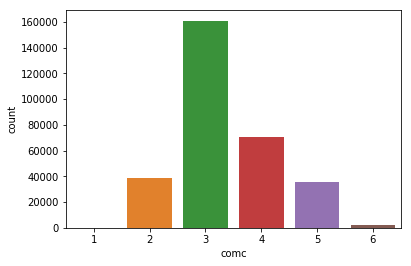

In [0]:
sns.countplot(train.comc)

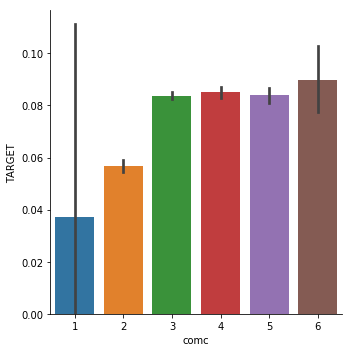

In [0]:
sns.catplot(x='comc',y='TARGET',data=train,kind='bar')

## 1-2.Previous

In [0]:
pre=pd.read_csv("../input/previous_application.csv")

In [0]:
pre.head(1)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0


## 1-3.Installment

In [0]:
train=pd.read_csv('../input/application_train.csv')

In [0]:
install=pd.read_csv('../input/installments_payments.csv')

In [0]:
# DAYS_INSTALMENT : the due date ,DAYS_ENTRY_PAYMENT : actually paid, + value: not paid , -: pre paid
install['Expired']=  install.DAYS_ENTRY_PAYMENT-install.DAYS_INSTALMENT 

In [0]:
install['Expired'].describe()

count    1.360250e+07
mean    -8.787405e+00
std      2.553990e+01
min     -3.189000e+03
25%     -1.400000e+01
50%     -6.000000e+00
75%      0.000000e+00
max      2.884000e+03
Name: Expired, dtype: float64

In [0]:
def third_class(x):
    if x==0:
        return 0
    elif x>0:
        return 1
    else:
        return -1
install['Expired1']=install['Expired'].apply(third_class)


In [0]:
install['Debt']=install['AMT_INSTALMENT']-install['AMT_PAYMENT']
install['Debt'].describe()

count    1.360250e+07
mean    -1.871538e+02
std      1.910673e+04
min     -2.630909e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.424726e+06
Name: Debt, dtype: float64

In [0]:
install[install.Debt<0].shape[0] / install.shape[0] *100

1.3185719406579783

In [0]:
install[install.Debt<0][['Debt','Expired1']].groupby('Expired1').count()


,Debt
Expired1,
-1,171724
0,7186
1,487


In [0]:
install[(install.Debt<0) &(install.Expired1<=0)].loc[:,'Debt']=0
install[(install.Debt<0) &(install.Expired1>0)].loc[:,'Debt']=install['Debt'].median()

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
